In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sys
import os
import psycopg2 as psy
from psycopg2 import sql
from io import StringIO
import sqlalchemy
from sqlalchemy import create_engine
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import mtg_helpers as mtgh

# import psycopg2 as psy
# from psycopg2 import sql
# from io import StringIO
# import sqlalchemy
# from sqlalchemy import create_engine

con_details = {"dbname" : 'pay_to_play', 
               "user" : os.environ['PGSQL_P_USER'], 
               "password" : os.environ['PGSQL_P_PWD'], 
               "host" : 'localhost'} 


In [10]:
conn = mtgh.connect(con_details)

Connecting to PostgreSQL database...
Connection successful


In [11]:
query = sql.SQL(
    """SELECT 
            core.uuid, core.name, core.rarity, core."setCode", core."keywords", core."convertedManaCost", 
            core.type, core.power, core.toughness, core.subtypes, core.supertypes, 
            setdetails.setname, setdetails.setreleasedate, fixed_prices.price, fixed_prices."price_date"
    FROM core
    JOIN fixed_prices ON core.uuid = fixed_prices.uuid
    JOIN setdetails  ON core."setCode" = setdetails.setcode""")
card_df = pd.read_sql(query, conn)

In [12]:
card_df.describe()

,convertedManaCost,price
count,3536.000000,3536.000000
mean,3.030826,1.819762
std,1.816913,4.962194
min,0.000000,0.150000
25%,2.000000,0.250000
50%,3.000000,0.250000
75%,4.000000,0.990000
max,12.000000,109.990000


### This gives a nice view to the ranges of price and converted mana cost across the sets in this analysis.

In [13]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               3536 non-null   object 
 1   name               3536 non-null   object 
 2   rarity             3536 non-null   object 
 3   setCode            3536 non-null   object 
 4   keywords           1503 non-null   object 
 5   convertedManaCost  3536 non-null   float64
 6   type               3536 non-null   object 
 7   power              1844 non-null   object 
 8   toughness          1844 non-null   object 
 9   subtypes           3536 non-null   object 
 10  supertypes         3536 non-null   object 
 11  setname            3536 non-null   object 
 12  setreleasedate     3536 non-null   object 
 13  price              3536 non-null   float64
 14  price_date         3536 non-null   object 
dtypes: float64(2), object(13)
memory usage: 414.5+ KB


### Initial sense of the completness of each key column for potential analysis. Some 'gaps' are expected/explainable in that keywords, power, and toughness tend to only apply to creature-types and thus a ~50% null rate is to be expected.  Because of either the inherent nature of the data or custom behavior on some MTG cards, there are very few fields that can be of numeric types.  Of note would be the power and toughness columns as for creatures these are typically integers except for some creatures that have variable values based on the state of the game and are represented as asterisks.  Can still do numerical analysis on these fields by limiting to just those values with pre-defined integer values and casting to int type.

array([[<AxesSubplot:title={'center':'ELD'}>,
        <AxesSubplot:title={'center':'GRN'}>,
        <AxesSubplot:title={'center':'IKO'}>],
       [<AxesSubplot:title={'center':'KHM'}>,
        <AxesSubplot:title={'center':'M20'}>,
        <AxesSubplot:title={'center':'M21'}>],
       [<AxesSubplot:title={'center':'RNA'}>,
        <AxesSubplot:title={'center':'THB'}>,
        <AxesSubplot:title={'center':'WAR'}>],
       [<AxesSubplot:title={'center':'ZNR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

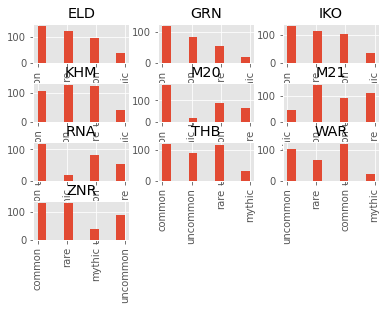

In [14]:
#fig, ax = plt.subplots()
card_df.hist('rarity', by = 'setCode')


In [15]:
from pandas_profiling import ProfileReport

In [17]:
profile = ProfileReport(card_df, title='Pandas Profiling Report')

In [18]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]